In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # Data processing
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns # Data visualization
from sklearn.model_selection import train_test_split, RandomizedSearchCV # Cross-validation, splitting sets
from sklearn.preprocessing import MinMaxScaler #Data scaling
import xgboost as xgb #Extreme Gradient Boosting
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score #Metrics
import matplotlib.ticker as mticker # Label format
from matplotlib.ticker import ScalarFormatter # Label format
from matplotlib.ticker import FuncFormatter
from sklearn.impute import SimpleImputer
import copy

In [ ]:
# Load the financial transaction data
df = pd.read_csv('fraud dataset.csv')
#https://www.kaggle.com/datasets/ealaxi/paysim1?select=PS_20174392719_1491204439457_log.csv

In [ ]:
frauds_df= copy.deepcopy(df)

In [ ]:


frauds_df.rename(columns={'type':'Type',
                  'amount':'Amount',
                  'nameOrig':'Customer ID',
                  'oldbalanceOrg':'Customer Before',
                  'newbalanceOrig':'Customer After',
                  'nameDest': 'Destination ID',
                  'oldbalanceDest': 'Destination Before',
                  'newbalanceDest': 'Destination After',
                  'isFraud':'Fraud',
                  'isFlaggedFraud':'Flagged'},
                  inplace=True)



In [ ]:
frauds_df.head(5)

,step,Type,Amount,Customer ID,Customer Before,Customer After,Destination ID,Destination Before,Destination After,Fraud,Flagged
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
frauds_df['Customer Type'] = frauds_df['Customer ID'].str.split('\d+', expand=True, n=1)[0]
frauds_df['Destination Type'] = frauds_df['Destination ID'].str.split('\d+', expand=True, n=1)[0]

In [ ]:

frauds_df['Type'].replace({'CASH_OUT':'Cash Out',
                           'PAYMENT':'Payment',
                           'CASH_IN':'Cash In',
                           'TRANSFER':'Transfer',
                           'DEBIT':'Debit'},
                           inplace=True)

frauds_df[['Type',
           'Customer Type',
           'Destination Type']] = frauds_df[['Type',
                                             'Customer Type',
                                             'Destination Type']].astype('category')

In [ ]:
frauds_df[['Fraud',
           'Flagged']] = frauds_df[['Fraud',
                                    'Flagged']].astype('bool')

display(frauds_df.describe(include='all'))

display('Missing Values:')
display(frauds_df.isna().sum())

display('Data Format:')
display(frauds_df.info())

,step,Type,Amount,Customer ID,Customer Before,Customer After,Destination ID,Destination Before,Destination After,Fraud,Flagged,Customer Type,Destination Type
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6362620,6362620,6362620
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,2,2,1,2
top,NaN,Cash Out,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,False,False,C,C
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,6354407,6362604,6362620,4211125
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,NaN,NaN,NaN,NaN
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,NaN,NaN,NaN,NaN
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,NaN,NaN,NaN,NaN
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,NaN,NaN,NaN,NaN


'Missing Values:'

step                  0
Type                  0
Amount                0
Customer ID           0
Customer Before       0
Customer After        0
Destination ID        0
Destination Before    0
Destination After     0
Fraud                 0
Flagged               0
Customer Type         0
Destination Type      0
dtype: int64

'Data Format:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column              Dtype   
---  ------              -----   
 0   step                int64   
 1   Type                category
 2   Amount              float64 
 3   Customer ID         object  
 4   Customer Before     float64 
 5   Customer After      float64 
 6   Destination ID      object  
 7   Destination Before  float64 
 8   Destination After   float64 
 9   Fraud               bool    
 10  Flagged             bool    
 11  Customer Type       category
 12  Destination Type    category
dtypes: bool(2), category(3), float64(5), int64(1), object(2)
memory usage: 418.7+ MB


None

In [ ]:
def my_catplot(feature=None, ax=None):
    sns.countplot(data=frauds_df[:100000], x=feature, hue='Fraud', palette=(palette[0], palette[-1]), ax=ax)
    ax.set_xlabel('Number of Observations')
    ax.set_ylabel(f'{feature}')

def my_histplot(feature=None, ax=None):
    sns.histplot(data=frauds_df[:100000],
                         x=feature,
                         hue='Fraud',
                         kde=True,
                         element='step',
                         palette=(palette[0],
                                  palette[-1]),
                         ax=ax,
                         log_scale=True)
    ax.set_ylabel('Number of Observations')
    ax.set_xlabel(f'{feature}')
    mean_value_f = frauds_df[frauds_df['Fraud']==False][feature].mean()
    mean_value_t = frauds_df[frauds_df['Fraud']==True][feature].mean()
    ax.axvline(x=mean_value_f,
               color=palette[0])
    ax.axvline(x=mean_value_t,
                color=palette[-1])
    ax.annotate(f'Mean {feature}\n for regular transactions: ${mean_value_f:,.2f}',
                 xy=(0.1, 0.5),
                 xycoords='axes fraction',
                 font='roboto',
                 fontstyle='italic')
    ax.annotate(f'Mean {feature}\n for fraudulent transactions: ${mean_value_t:,.2f}',
                 xy=(0.1, 0.3),
                 xycoords='axes fraction',
                 font='roboto',
                 fontstyle='italic')

def cm_auc_vis(y_test, y_pred, probs):
    #Creating f1-score
    f1 = f1_score(y_test, y_pred)
    #Creating ROC curve
    fallout, sensitivity, thresholds = roc_curve(y_test, probs[:, 1])
    #Computing the ROC AUC score
    auc = roc_auc_score(y_test, probs[:, 1])
    # Plot the ROC curve and confusion matrix for this model
    sns.set_style('white')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle(f'ROC AUC Score & Confusion Matrix \n ROC AUC Score: {auc:.4%} \n F1-Score: {f1:.4%}', fontsize=16, font='Verdana')
    sns.lineplot(x=fallout, y=sensitivity, ax=ax1, color=palette[-1])
    ax1.axline(xy1=[0, 0], xy2=[1, 1], linestyle='--', color=palette[0])
    ax1.set_xlabel('Fallout')
    ax1.set_ylabel('Sensitivity')
    #Creating Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='all', ax=ax2, cmap='coolwarm', values_format=',.4%')

    plt.show()

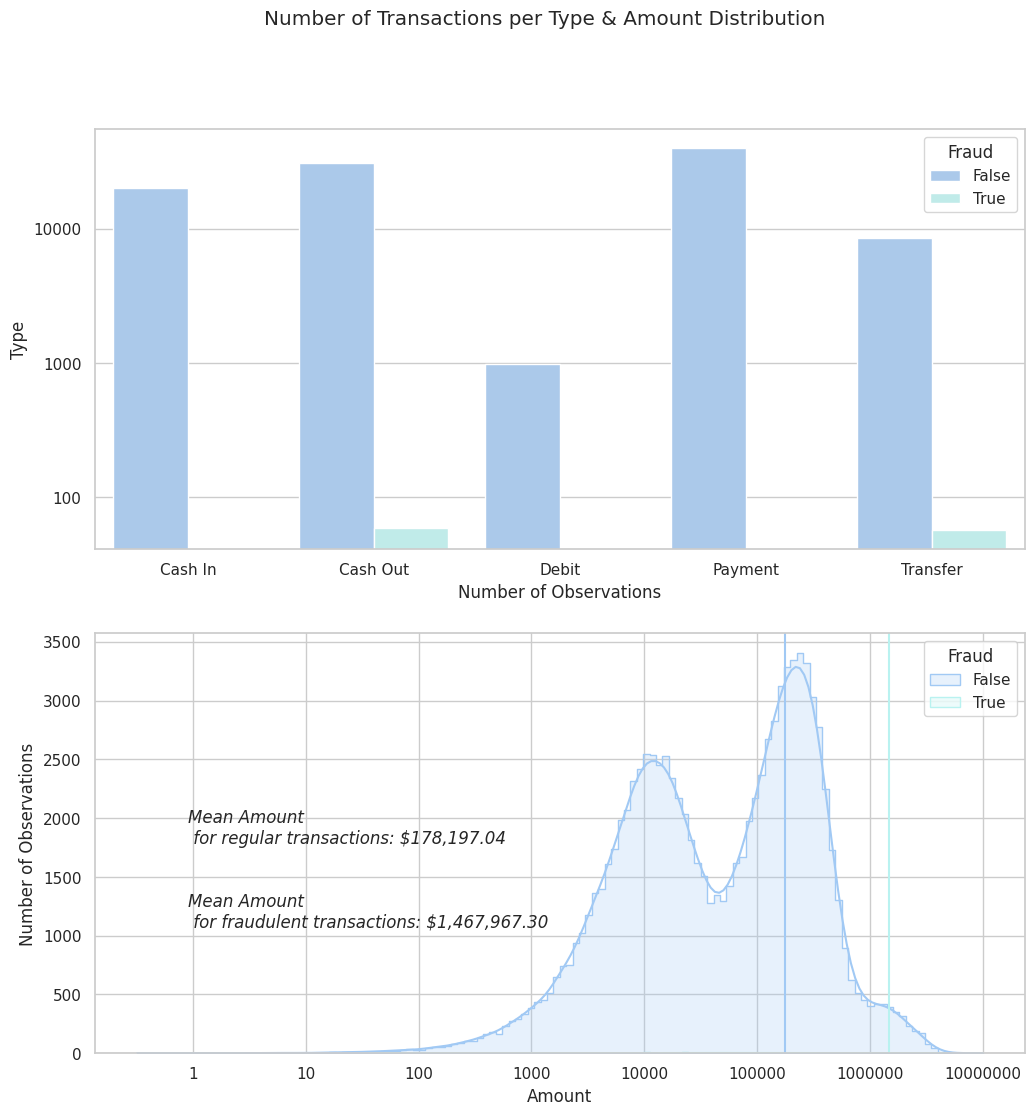

In [ ]:
#Setting styles for charts
sns.set_style('whitegrid')
sns.set_context('notebook')
#sns.set_palette('RdGy_r')
sns.set_palette("pastel")

#palette = sns.color_palette('RdGy_r')
palette = sns.color_palette("pastel")
#Creating visualizations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
fig.suptitle('Number of Transactions per Type & Amount Distribution')

my_catplot('Type', ax1)
ax1.set_yscale('log')
ax1.yaxis.set_major_formatter(mticker.ScalarFormatter())

my_histplot('Amount', ax2)
ax2.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax2.ticklabel_format(style='plain', axis='x')


plt.show()


In [ ]:
frauds_df.head(5)

,step,Type,Amount,Customer ID,Customer Before,Customer After,Destination ID,Destination Before,Destination After,Fraud,Flagged,Customer Type,Destination Type
0,1,Payment,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,False,False,C,M
1,1,Payment,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,False,False,C,M
2,1,Transfer,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,True,False,C,C
3,1,Cash Out,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,True,False,C,C
4,1,Payment,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,False,False,C,M


In [ ]:
frauds_df.drop(columns=['Type', 'Customer ID', 'Destination ID'], inplace=True)
frauds_df[['Amount (Log)',
           'Customer Before (Log)',
           'Customer After (Log)',
           'Destination Before (Log)',
           'Destination After (Log)']] = frauds_df[['Amount',
           'Customer Before',
           'Customer After',
           'Destination Before',
           'Destination After']].apply(np.log1p)

In [ ]:
correlation = frauds_df.corr()
print(correlation['Fraud'].sort_values(ascending=False))

<ipython-input-14-8093895aa49e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = frauds_df.corr()


Fraud                       1.000000
Amount                      0.076688
Flagged                     0.044109
Amount (Log)                0.040640
Customer Before (Log)       0.034560
step                        0.031578
Customer Before             0.010154
Destination After           0.000535
Destination Before         -0.005885
Destination After (Log)    -0.007659
Customer After             -0.008148
Destination Before (Log)   -0.017281
Customer After (Log)       -0.028760
Name: Fraud, dtype: float64


In [ ]:
'''
sns.set_style('white')

frauds_df = pd.get_dummies(frauds_df)

X = frauds_df.copy()
y = X.pop('Fraud')

simp = SimpleImputer()
X_imputed = simp.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, train_size=0.7, stratify=y,random_state=42)

mms = MinMaxScaler()

scaled_X_train = mms.fit_transform(X_train)
scaled_X_test= mms.fit_transform(X_test)

# Initiating Model
#gbt = xgb.XGBClassifier(objective='binary:logistic',
#                        learning_rate=0.1,
#                        random_state=42,
#                        early_stopping_rounds=5,
#                        gamma=0.1,
#                        min_child_weight=2,
#
#                        reg_lambda=2)

#gbt.fit(scaled_X_train, y_train, eval_set=[(scaled_X_test, y_test)], verbose=False)
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
model = DecisionTreeClassifier()
#model=RandomForestClassifier(random_state=0)
model.fit(scaled_X_train, y_train)
print(model.score(scaled_X_test, y_test))
'''


"\nsns.set_style('white')\n\nfrauds_df = pd.get_dummies(frauds_df)\n\nX = frauds_df.copy()\ny = X.pop('Fraud')\n\nsimp = SimpleImputer()\nX_imputed = simp.fit_transform(X)\n\nX_train, X_test, y_train, y_test = train_test_split(X_imputed, y, train_size=0.7, stratify=y,random_state=42)\n\nmms = MinMaxScaler()\n\nscaled_X_train = mms.fit_transform(X_train)\nscaled_X_test= mms.fit_transform(X_test)\n\n# Initiating Model\n#gbt = xgb.XGBClassifier(objective='binary:logistic',\n#                        learning_rate=0.1,\n#                        random_state=42,\n#                        early_stopping_rounds=5,\n#                        gamma=0.1,\n#                        min_child_weight=2,\n#                        \n#                        reg_lambda=2)\n\n#gbt.fit(scaled_X_train, y_train, eval_set=[(scaled_X_test, y_test)], verbose=False)\nfrom sklearn.tree import DecisionTreeClassifier\n#from sklearn.ensemble import RandomForestClassifier\nmodel = DecisionTreeClassifier()\n#model=Ran

In [ ]:
from sklearn.model_selection import train_test_split
x = np.array(frauds_df[['step','Amount','Customer Before (Log)','Flagged','Amount (Log)']])
y = np.array(frauds_df[["Fraud"]])
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9996982375185065


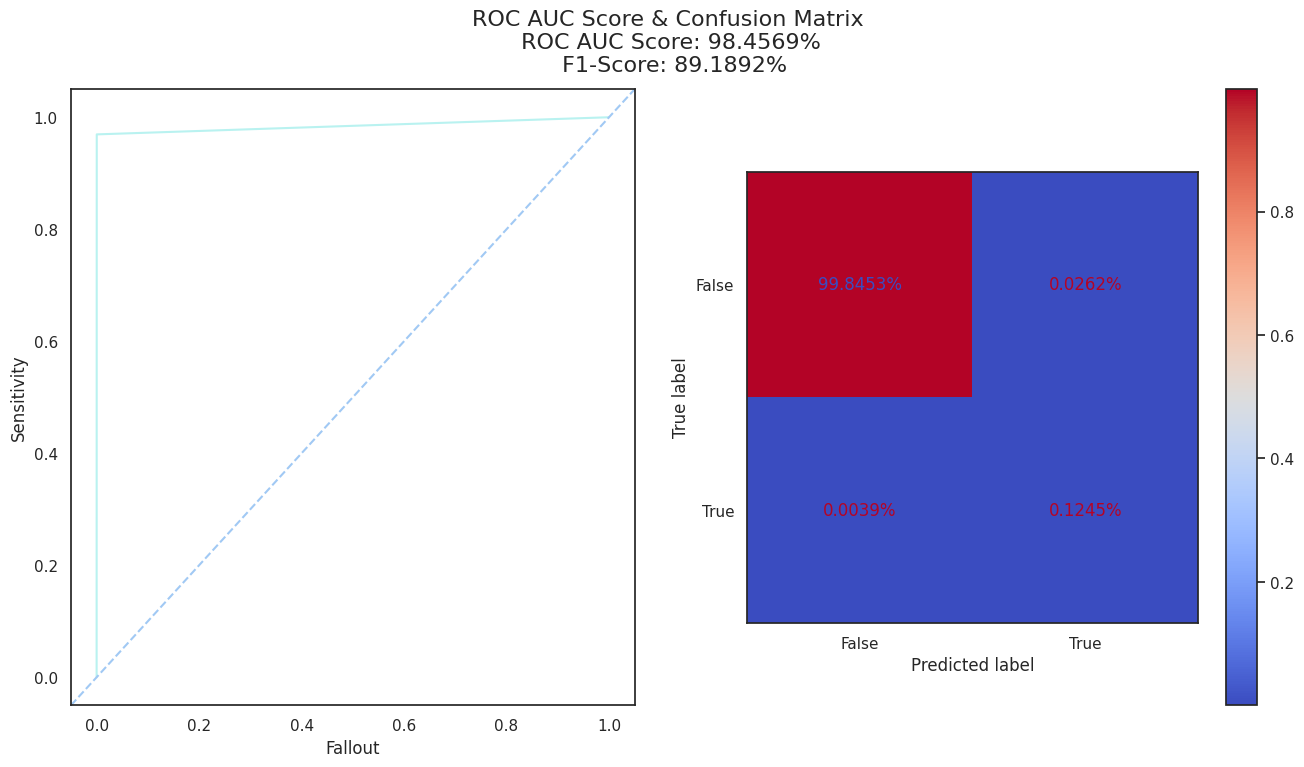

In [ ]:
# Creating predictions

#y_pred = model.predict(scaled_X_test)
#probs = model.predict_proba(scaled_X_test)
y_pred = model.predict(xtest)
probs = model.predict_proba(xtest)

# Visualizing with helper function
cm_auc_vis(y_pred=y_pred, y_test=ytest, probs=probs)

In [ ]:
frauds_df.head(2)

,step,Amount,Customer Before,Customer After,Destination Before,Destination After,Fraud,Flagged,Customer Type,Destination Type,Amount (Log),Customer Before (Log),Customer After (Log),Destination Before (Log),Destination After (Log)
0,1,9839.64,170136.0,160296.36,0.0,0.0,False,False,C,M,9.194276,12.044359,11.984786,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,False,False,C,M,7.531166,9.964112,9.872292,0.0,0.0


In [ ]:
testdf = frauds_df.head(20)


In [ ]:
testdf.head(5)

,step,Amount,Customer Before,Customer After,Destination Before,Destination After,Fraud,Flagged,Customer Type,Destination Type,Amount (Log),Customer Before (Log),Customer After (Log),Destination Before (Log),Destination After (Log)
0,1,9839.64,170136.0,160296.36,0.0,0.0,False,False,C,M,9.194276,12.044359,11.984786,0.000000,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,False,False,C,M,7.531166,9.964112,9.872292,0.000000,0.0
2,1,181.00,181.0,0.00,0.0,0.0,True,False,C,C,5.204007,5.204007,0.000000,0.000000,0.0
3,1,181.00,181.0,0.00,21182.0,0.0,True,False,C,C,5.204007,5.204007,0.000000,9.960954,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,False,False,C,M,9.364703,10.634773,10.305174,0.000000,0.0


In [ ]:
testdf[['step','Amount','Customer Before']]

,step,Amount,Customer Before
0,1,9839.64,170136.00
1,1,1864.28,21249.00
2,1,181.00,181.00
3,1,181.00,181.00
4,1,11668.14,41554.00
5,1,7817.71,53860.00
6,1,7107.77,183195.00
7,1,7861.64,176087.23
8,1,4024.36,2671.00
9,1,5337.77,41720.00


In [ ]:
#result=lambda i : 1 if model.predict(i) else 0
testdf["predict"]= model.predict(testdf[['step','Amount','Customer Before (Log)','Flagged','Amount (Log)']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
<ipython-input-22-6da7c2e58f36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf["predict"]= model.predict(testdf[['step','Amount','Customer Before (Log)','Flagged','Amount (Log)']])


In [ ]:
testdf

,step,Amount,Customer Before,Customer After,Destination Before,Destination After,Fraud,Flagged,Customer Type,Destination Type,Amount (Log),Customer Before (Log),Customer After (Log),Destination Before (Log),Destination After (Log),predict
0,1,9839.64,170136.00,160296.36,0.0,0.00,False,False,C,M,9.194276,12.044359,11.984786,0.000000,0.000000,False
1,1,1864.28,21249.00,19384.72,0.0,0.00,False,False,C,M,7.531166,9.964112,9.872292,0.000000,0.000000,False
2,1,181.00,181.00,0.00,0.0,0.00,True,False,C,C,5.204007,5.204007,0.000000,0.000000,0.000000,True
3,1,181.00,181.00,0.00,21182.0,0.00,True,False,C,C,5.204007,5.204007,0.000000,9.960954,0.000000,True
4,1,11668.14,41554.00,29885.86,0.0,0.00,False,False,C,M,9.364703,10.634773,10.305174,0.000000,0.000000,False
5,1,7817.71,53860.00,46042.29,0.0,0.00,False,False,C,M,8.964275,10.894162,10.737337,0.000000,0.000000,False
6,1,7107.77,183195.00,176087.23,0.0,0.00,False,False,C,M,8.869085,12.118312,12.078740,0.000000,0.000000,False
7,1,7861.64,176087.23,168225.59,0.0,0.00,False,False,C,M,8.969878,12.078740,12.033067,0.000000,0.000000,False
8,1,4024.36,2671.00,0.00,0.0,0.00,False,False,C,M,8.300370,7.890583,0.000000,0.000000,0.000000,False
9,1,5337.77,41720.00,36382.23,41898.0,40348.79,False,False,C,C,8.582751,10.638760,10.501863,10.643017,10.605341,False


Identifying Feature Importances

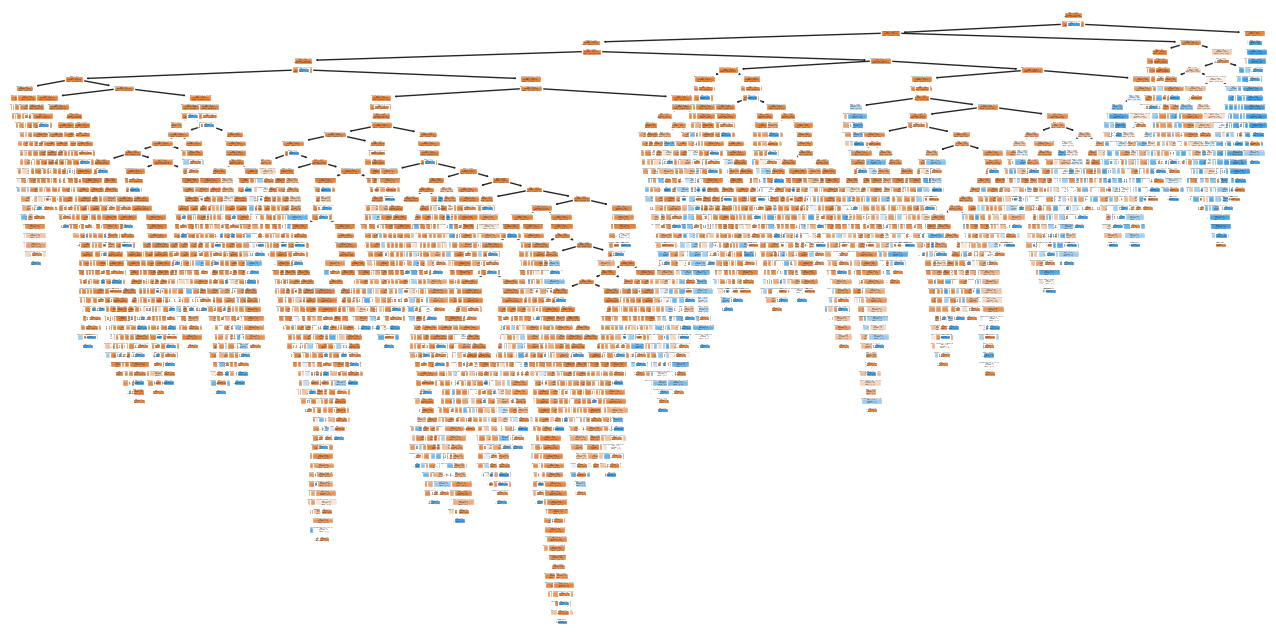

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(16,8))
_ = tree.plot_tree(model,feature_names = frauds_df.columns,
                   filled=True)

In [ ]:
from sklearn.inspection import permutation_importance
#feature_names = X.columns
feature_names = ['step','Amount','Customer Before (Log)','Flagged','Amount (Log)']
#result = permutation_importance(
#    model, scaled_X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
#)
result = permutation_importance(
    model, xtest, ytest, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

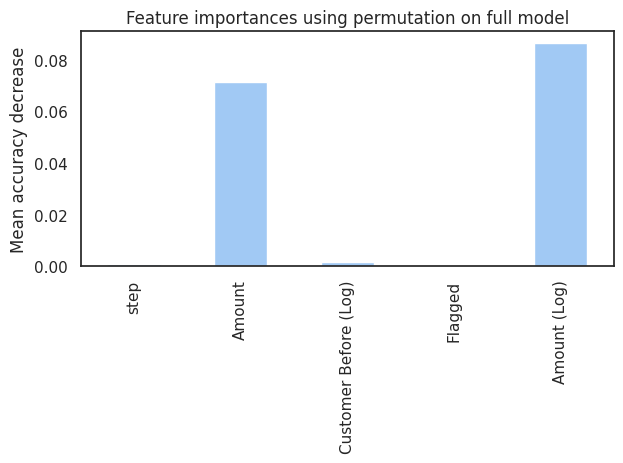

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()







**Isolation Forest**

In [ ]:
from sklearn.ensemble import IsolationForest

x_if = np.array(frauds_df[['step', 'Amount', 'Customer Before (Log)', 'Flagged', 'Amount (Log)']])
y_if = np.array(frauds_df["Fraud"].astype(int))

#y_if = np.where(frauds_df["Fraud"].astype(int) == 1, -1, 1)

xtrain_if, xtest_if, ytrain_if, ytest_if = train_test_split(x_if, y_if, test_size=0.10, random_state=42)

model_if = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1), random_state=42)
model_if.fit(xtrain_if)

y_pred_if = model.predict(xtest)

print(y_pred_if)

print(model_if.score_samples(xtest_if))

scores = -model_if.decision_function(xtest_if)
# Set threshold for anomalies
threshold = np.percentile(scores, 10)

# Identify anomalies
anomalies = xtest_if[scores < threshold]

print(anomalies)

[False False False ... False False False]
[-0.43100962 -0.48110757 -0.47056141 ... -0.4394623  -0.45628983
 -0.52098856]
[[211 153486.36 9.92705758404856 False 11.941373497341957]
 [322 36598.65 9.0169570589246 False 10.507793956502203]
 [158 124443.29 9.563599488613745 False 11.731613424862859]
 ...
 [253 15374.53 11.532688875811179 False 9.640532563625303]
 [153 64184.13 11.507370062256532 False 11.069526842912317]
 [280 106106.9 10.327676274642394 False 11.572211779888645]]


In [ ]:
# compute anomaly scores for test set using the Isolation Forest model
anomaly_scores = -model_if.score_samples(xtest_if)

# set threshold for binary predictions (you may need to tune this based on your data)
threshold = -0.1

# make binary predictions based on anomaly scores and threshold
y_pred_if = np.where(anomaly_scores < threshold, 1, 0)

# compute accuracy score
accuracy_if = np.mean(y_pred_if == ytest_if)
print(f"Accuracy score: {accuracy_if}")

Accuracy score: 0.9987159377740616


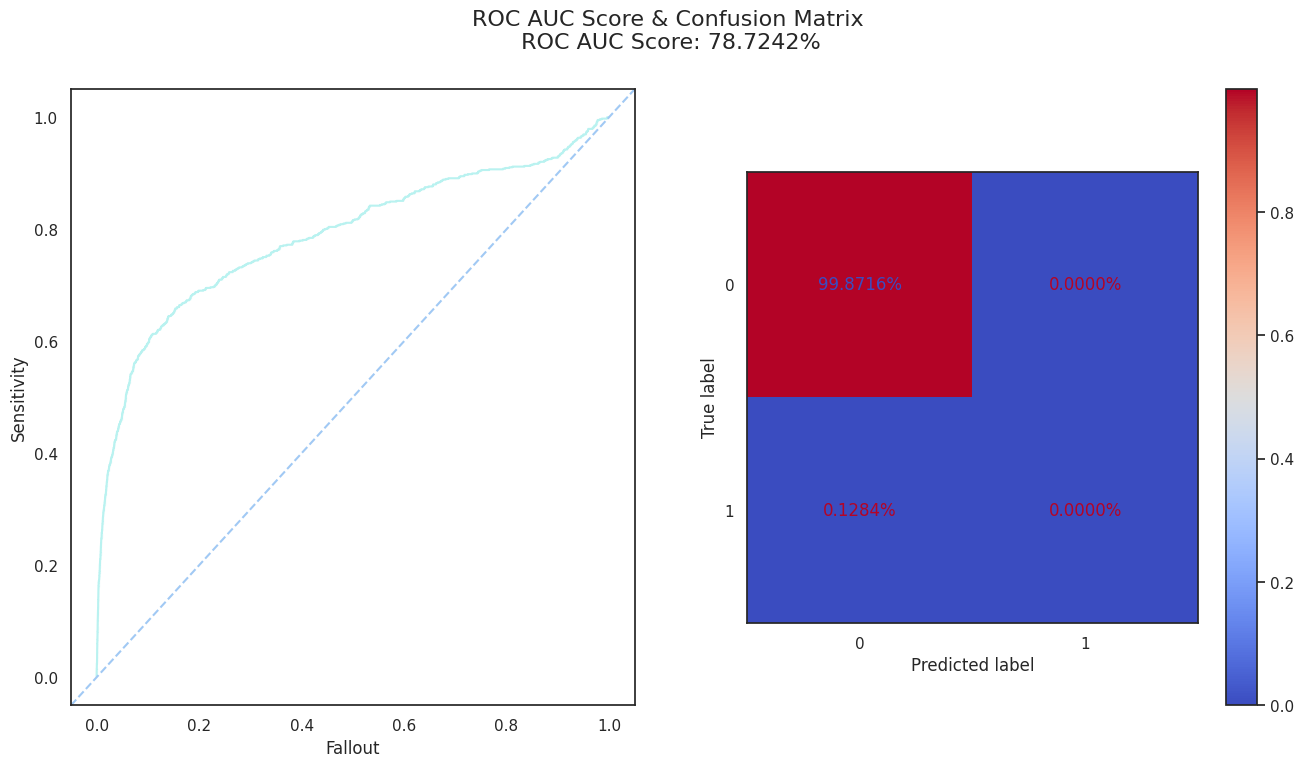

In [ ]:
# create confusion matrix
#cm = confusion_matrix(ytest_if, y_pred_if)
from sklearn.metrics import roc_curve, auc

# predict anomaly scores for the test set using the Isolation Forest model
anomaly_scores = -model_if.decision_function(xtest_if)


# calculate false positive rate, true positive rate, and thresholds for ROC curve
fallout, sensitivity, thresholds = roc_curve(ytest_if, anomaly_scores)
# calculate area under the curve (AUC) for the ROC curve
roc_auc = auc(fallout, sensitivity)

sns.set_style('white')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle(f'ROC AUC Score & Confusion Matrix \n ROC AUC Score: {roc_auc:.4%} \n ', fontsize=16, font='Verdana')
sns.lineplot(x=fallout, y=sensitivity, ax=ax1, color=palette[-1])
ax1.axline(xy1=[0, 0], xy2=[1, 1], linestyle='--', color=palette[0])
ax1.set_xlabel('Fallout')
ax1.set_ylabel('Sensitivity')
ConfusionMatrixDisplay.from_predictions(ytest_if, y_pred_if, normalize='all', ax=ax2, cmap='coolwarm', values_format=',.4%')
# plot confusion matrix
#sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
plt.show()

In [ ]:
# predict labels for test set using the Isolation Forest model
y_pred_if_sample = model_if.predict(testdf[['step', 'Amount', 'Customer Before (Log)', 'Flagged', 'Amount (Log)']])



# add predicted labels to testdf as a new column
testdf['predict_if'] = y_pred_if_sample

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
<ipython-input-32-d234e09551d9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['predict_if'] = y_pred_if_sample


In [ ]:
testdf

,step,Amount,Customer Before,Customer After,Destination Before,Destination After,Fraud,Flagged,Customer Type,Destination Type,Amount (Log),Customer Before (Log),Customer After (Log),Destination Before (Log),Destination After (Log),predict,predict_if
0,1,9839.64,170136.00,160296.36,0.0,0.00,False,False,C,M,9.194276,12.044359,11.984786,0.000000,0.000000,False,1
1,1,1864.28,21249.00,19384.72,0.0,0.00,False,False,C,M,7.531166,9.964112,9.872292,0.000000,0.000000,False,-1
2,1,181.00,181.00,0.00,0.0,0.00,True,False,C,C,5.204007,5.204007,0.000000,0.000000,0.000000,True,-1
3,1,181.00,181.00,0.00,21182.0,0.00,True,False,C,C,5.204007,5.204007,0.000000,9.960954,0.000000,True,-1
4,1,11668.14,41554.00,29885.86,0.0,0.00,False,False,C,M,9.364703,10.634773,10.305174,0.000000,0.000000,False,1
5,1,7817.71,53860.00,46042.29,0.0,0.00,False,False,C,M,8.964275,10.894162,10.737337,0.000000,0.000000,False,1
6,1,7107.77,183195.00,176087.23,0.0,0.00,False,False,C,M,8.869085,12.118312,12.078740,0.000000,0.000000,False,1
7,1,7861.64,176087.23,168225.59,0.0,0.00,False,False,C,M,8.969878,12.078740,12.033067,0.000000,0.000000,False,1
8,1,4024.36,2671.00,0.00,0.0,0.00,False,False,C,M,8.300370,7.890583,0.000000,0.000000,0.000000,False,1
9,1,5337.77,41720.00,36382.23,41898.0,40348.79,False,False,C,C,8.582751,10.638760,10.501863,10.643017,10.605341,False,1


In [ ]:
def my_catplot1(feature=None, ax=None):
    sns.countplot(data=testdf[:100000], x=feature, hue='Fraud', palette=(palette[0], palette[-1]), ax=ax)
    ax.set_xlabel('Number of Observations')
    ax.set_ylabel(f'{feature}')

def my_histplot1(feature=None, ax=None):
    sns.histplot(data=testdf[:100000],
                         x=feature,
                         hue='predict_if',
                         kde=True,
                         element='step',
                         palette=[palette[0], palette[-1]],
                         ax=ax,
                         log_scale=True)
    ax.set_ylabel('Number of Observations')
    ax.set_xlabel(f'{feature}')
    mean_value_f = testdf[testdf['predict_if']==1][feature].mean()
    mean_value_t = testdf[testdf['predict_if']==-1][feature].mean()
    ax.axvline(x=mean_value_f,
               color=palette[0])
    ax.axvline(x=mean_value_t,
                color=palette[-1])
    ax.annotate(f'Mean {feature}\n for regular transactions: ${mean_value_f:,.2f}',
                 xy=(0.1, 0.5),
                 xycoords='axes fraction',
                 font='roboto',
                 fontstyle='italic')
    ax.annotate(f'Mean {feature}\n for fraudulent transactions: ${mean_value_t:,.2f}',
                 xy=(0.1, 0.3),
                 xycoords='axes fraction',
                 font='roboto',
                 fontstyle='italic')


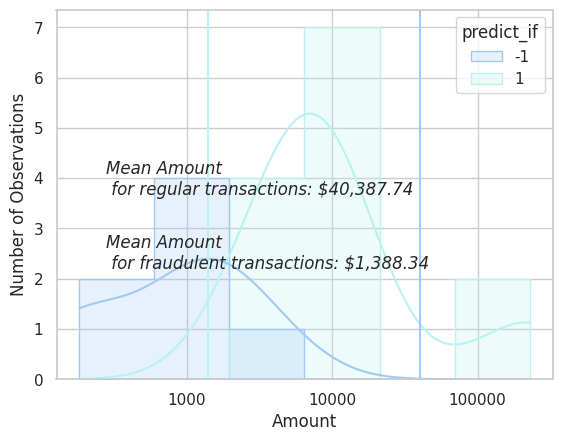

In [ ]:
#Setting styles for charts
sns.set_style('whitegrid')
sns.set_context('notebook')
#sns.set_palette('RdGy_r')
sns.set_palette("pastel")

#palette = sns.color_palette('RdGy_r')
palette = sns.color_palette("pastel")
#Creating visualizations
fig, ax = plt.subplots()



my_histplot1('Amount', ax)
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.ticklabel_format(style='plain', axis='x')


plt.show()